In [1]:
from update_total_usd_exit_liqudity import fetch_exit_liqudity_tvl

(
    all_valid_dex_dfs,
    all_chain_asset_exposure_df,
    our_token_to_total_other_token_liquidity,
    token_symbol_to_dfs,
    all_portion_ownership_by_destinations,
    all_coingecko_prices,
) = fetch_exit_liqudity_tvl()

In [15]:
pool_to_portion_ownership = all_portion_ownership_by_destinations.set_index("getPool")["portion_ownership"].to_dict()
all_valid_dex_dfs["tokemak_portion_ownership"] = (
    all_valid_dex_dfs["pairAddress"].str.lower().map(pool_to_portion_ownership).fillna(0.0)
)
all_valid_dex_dfs["scaled_quote_usd_liquidity"] = all_valid_dex_dfs["quote_token_usd_liquidity"] * (
    1 - all_valid_dex_dfs["tokemak_portion_ownership"]
)
all_valid_dex_dfs["scaled_base_usd_liquidity"] = all_valid_dex_dfs["base_token_usd_liquidity"] * (
    1 - all_valid_dex_dfs["tokemak_portion_ownership"]
)

all_valid_dex_dfs

,chainId,dexId,url,pairAddress,labels,priceNative,priceUsd,txns,volume,priceChange,...,liquidity_quote,base_token_price_usd,quote_token_price_usd,base_token_usd_liquidity,quote_token_usd_liquidity,chain_id,reference_asset,tokemak_portion_ownership,scaled_quote_usd_liquidity,scaled_base_usd_liquidity
0,ethereum,uniswap,https://dexscreener.com/ethereum/0xac5a2c404eb...,0xac5A2c404EbBa22a869998089AC7893ff4E1F0a7,[v3],17.7501,17.75,"{'m5': {'buys': 0, 'sells': 0}, 'h1': {'buys':...","{'h24': 16371.43, 'h6': 3608.99, 'h1': 348.34,...","{'h1': 0.21, 'h6': -1.5, 'h24': -3.14}",...,8871.48780,1.773853e+01,1.000104,24838.0,8872.0,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000000,8872.00000,2.483800e+04
1,ethereum,curve,https://dexscreener.com/ethereum/0x34d655069f4...,0x34D655069F4cAc1547E4C8cA284FfFF5ad4A8db0,NaN,0.9971,0.9971,"{'m5': {'buys': 0, 'sells': 0}, 'h1': {'buys':...","{'h24': 98.07, 'h6': 0, 'h1': 0, 'm5': 0}",{},...,734.89420,9.978603e-01,0.999703,1804.0,735.0,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000000,735.00000,1.804000e+03
2,ethereum,uniswap,https://dexscreener.com/ethereum/0x8dacbad3b87...,0x8dacBaD3b875f95497a9497DcF177692E87A6F90,[v2],0.001666,0.001666,"{'m5': {'buys': 0, 'sells': 0}, 'h1': {'buys':...","{'h24': 11716.68, 'h6': 2169.31, 'h1': 0, 'm5'...","{'h6': -3.78, 'h24': -13.89}",...,80881.00000,1.731022e-03,1.000104,83996.0,80889.0,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000000,80889.00000,8.399600e+04
3,ethereum,curve,https://dexscreener.com/ethereum/0x635ef0056a5...,0x635EF0056A597D13863B73825CcA297236578595,[stbl],0.9982,0.9980,"{'m5': {'buys': 0, 'sells': 0}, 'h1': {'buys':...","{'h24': 42470.4, 'h6': 0, 'h1': 0, 'm5': 0}",{'h24': 0.01},...,436126.00000,9.978707e-01,0.999703,1962188.0,435997.0,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.187402,354290.32092,1.594470e+06
4,ethereum,curve,https://dexscreener.com/ethereum/0x9978c6b08d2...,0x9978c6B08d28d3B74437c917c5dD7C026df9d55C,NaN,1.001887,1.0017,"{'m5': {'buys': 0, 'sells': 0}, 'h1': {'buys':...","{'h24': 239.37, 'h6': 0, 'h1': 0, 'm5': 0}",{'h24': 0.04},...,1542.82230,1.001619e+00,0.999703,729.0,1542.0,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000000,1542.00000,7.290000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,ethereum,uniswap,https://dexscreener.com/ethereum/0x543842cbfef...,0x543842CBfef3B3F5614B2153c28936967218A0E6,[v3],0.0000001226,0.0000001226,"{'m5': {'buys': 0, 'sells': 0}, 'h1': {'buys':...","{'h24': 263.41, 'h6': 79.45, 'h1': 0, 'm5': 0}","{'h6': -1.21, 'h24': -2.35}",...,2336.14080,1.239408e-07,1.000104,5516608.0,2336.0,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000000,2336.00000,5.516608e+06
84,ethereum,curve,https://dexscreener.com/ethereum/0x6d92b33e7e1...,0x6d92b33e7E1CadAE729488404E15e58305CaE98c,[stbl],1.07337,1.073,"{'m5': {'buys': 0, 'sells': 0}, 'h1': {'buys':...","{'h24': 124.23, 'h6': 0, 'h1': 0, 'm5': 0}",{},...,291.40200,1.081352e+00,0.999703,634.0,291.0,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000000,291.00000,6.340000e+02
85,ethereum,uniswap,https://dexscreener.com/ethereum/0x0db2da6b424...,0x0db2Da6b424360e7DCD44060CDe32Dab93fE0cEa,[v3],0.9915,0.9915,"{'m5': {'buys': 0, 'sells': 0}, 'h1': {'buys':...","{'h24': 174636.42, 'h6': 0, 'h1': 0, 'm5': 0}",{'h24': -0.07},...,153805.00000,9.915104e-01,1.000104,1129247.0,153821.0,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000000,153821.00000,1.129247e+06
86,ethereum,uniswap,https://dexscreener.com/ethereum/0x6b008be16bf...,0x6b008be16BFD99c44c56A82087Feed6f286527f1,[v3],0.04370,0.04370,"{'m5': {'buys': 0, 'sells': 0}, 'h1': {'buys':...","{'h24': 2840.33, 'h6': 184.84, 'h1': 0, 'm5': 0}","{'h6': -1.88, 'h24': -8.2}",...,2123.03717,4.310188e-02,1.000104,84319.0,2123.0,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000000,2123.00000,8.431900e+04


In [32]:
tokens_to_check_exit_liqudity_for = (
    all_chain_asset_exposure_df[
        (all_chain_asset_exposure_df["chain_id"] == 1) & (all_chain_asset_exposure_df["reference_symbol"] == "USDC")
    ]["token_address"]
    .unique()
    .tolist()
)

autoUSD_exposure_df = all_chain_asset_exposure_df[
    (all_chain_asset_exposure_df["chain_id"] == 1) & (all_chain_asset_exposure_df["reference_symbol"] == "USDC")
].copy()
autoUSD_exposure_df

our_token_to_total_other_token_liquidity = {}
token_symbol_to_dfs = {}

for token in tokens_to_check_exit_liqudity_for:
    # also works by token address
    sub_df = all_valid_dex_dfs[
        (all_valid_dex_dfs["base_token_address"] == token) | (all_valid_dex_dfs["quote_token_address"] == token)
    ]
    if sub_df.empty:
        continue

    quote_token_is_target = sub_df[(sub_df["quote_token_address"] == token)]
    quote_liqudity = quote_token_is_target.groupby("base_token_symbol")["scaled_base_usd_liquidity"].sum().to_dict()

    base_token_is_target = sub_df[(sub_df["base_token_address"] == token)]
    base_liqudity = base_token_is_target.groupby("quote_token_symbol")["scaled_quote_usd_liquidity"].sum().to_dict()

    for k, v in base_liqudity.items():
        if k not in quote_liqudity:
            quote_liqudity[k] = 0
        quote_liqudity[k] += v

    our_token_symbol = (
        quote_token_is_target["quote_token_symbol"].iloc[0]
        if not quote_token_is_target.empty
        else base_token_is_target["base_token_symbol"].iloc[0]
    )

    our_token_to_total_other_token_liquidity[our_token_symbol] = quote_liqudity
    token_symbol_to_dfs[our_token_symbol] = sub_df

rows = [
    {"from_token": outer_k, "to_token": inner_k, "total_exit_liqudity": v}
    for outer_k, inner_dict in our_token_to_total_other_token_liquidity.items()
    for inner_k, v in inner_dict.items()
]
import pandas as pd

exit_liqudity_df = pd.DataFrame(rows)
total_exit_liqudity_df = exit_liqudity_df.groupby("from_token")["total_exit_liqudity"].sum().round().reset_index()
total_exit_liqudity_df

,from_token,total_exit_liqudity
0,GHO,3355269.0
1,USDC,25107191.0
2,USDT,180377846.0
3,crvUSD,21813165.0
4,sUSDS,40118044.0
5,sUSDe,63757883.0
6,scrvUSD,56239992.0


In [48]:
autoUSD_exposure_df['usd_price'] = autoUSD_exposure_df['token_address'].map(all_coingecko_prices)

autoUSD_exposure_df['usd_exposure'] = (
    autoUSD_exposure_df['usd_price'] * autoUSD_exposure_df['quantity']
)

simple_auto_usd_exposure_df = autoUSD_exposure_df[['token_symbol', 'usd_exposure']].round()
print('mainnet autoUSD exposure')

our_exposure_vs_exit_liqudity_df = pd.merge(
    total_exit_liqudity_df, simple_auto_usd_exposure_df, left_on='from_token', right_on='token_symbol', how='left').drop(columns=['token_symbol'])

our_exposure_vs_exit_liqudity_df['percentage_of_exit_liquidity'] = ((
    our_exposure_vs_exit_liqudity_df['usd_exposure'] / our_exposure_vs_exit_liqudity_df['total_exit_liqudity']
    
).fillna(0) * 100).round(2)


for col in ["total_exit_liqudity", "usd_exposure"]:
    our_exposure_vs_exit_liqudity_df[col] = our_exposure_vs_exit_liqudity_df[col].apply(lambda x: f"${x:,.2f}")

our_exposure_vs_exit_liqudity_df

mainnet autoUSD exposure


,from_token,total_exit_liqudity,usd_exposure,percentage_of_exit_liquidity
0,GHO,"$3,355,269.00","$4,255,142.00",126.82
1,USDC,"$25,107,191.00","$3,026,076.00",12.05
2,USDT,"$180,377,846.00","$1,211,171.00",0.67
3,crvUSD,"$21,813,165.00","$1,299,145.00",5.96
4,sUSDS,"$40,118,044.00","$2,597,430.00",6.47
5,sUSDe,"$63,757,883.00","$164,726.00",0.26
6,scrvUSD,"$56,239,992.00","$2,915,968.00",5.18


In [49]:
autoUSD_exposure_df

,chain_id,reference_asset,reference_symbol,block,token_address,token_symbol,quantity,usd_price,usd_exposure
16,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,USDC,22997604,0x0655977FEb2f289A4aB78af67BAB0d17aAb84367,scrvUSD,2.762143e+06,1.055690,2.915968e+06
17,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,USDC,22997604,0x40D16FC0246aD3160Ccc09B8D0D3A2cD28aE6C2f,GHO,4.264222e+06,0.997871,4.255142e+06
18,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,USDC,22997604,0x9D39A5DE30e57443BfF2A8307A4256c8797A3497,sUSDe,1.389567e+05,1.185449,1.647261e+05
19,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,USDC,22997604,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,USDC,3.026492e+06,0.999863,3.026076e+06
20,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,USDC,22997604,0xa3931d71877C0E7a3148CB7Eb4463524FEc27fbD,sUSDS,2.449568e+06,1.060362,2.597430e+06
21,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,USDC,22997604,0xdAC17F958D2ee523a2206206994597C13D831ec7,USDT,1.211044e+06,1.000104,1.211171e+06
22,1,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,USDC,22997604,0xf939E0A03FB07F59A73314E73794Be0E57ac1b4E,crvUSD,1.299530e+06,0.999703,1.299145e+06


,from_token,total_exit_liqudity,usd_exposure,percentage_of_exit_liquidity
0,GHO,"$3,355,269.00","$4,255,142.00",126.82
1,USDC,"$25,107,191.00","$3,026,076.00",12.05
2,USDT,"$180,377,846.00","$1,211,171.00",0.67
3,crvUSD,"$21,813,165.00","$1,299,145.00",5.96
4,sUSDS,"$40,118,044.00","$2,597,430.00",6.47
5,sUSDe,"$63,757,883.00","$164,726.00",0.26
6,scrvUSD,"$56,239,992.00","$2,915,968.00",5.18


In [ ]:
# maybe this is a lower bound?
# the USDC exit liqudity, is not right
# USDT looks right, directionally
# GHO is misleading, becuase it misses the aGHO pool

# check out the oods API and https://app.odos.xyz/ another soruce of truth?



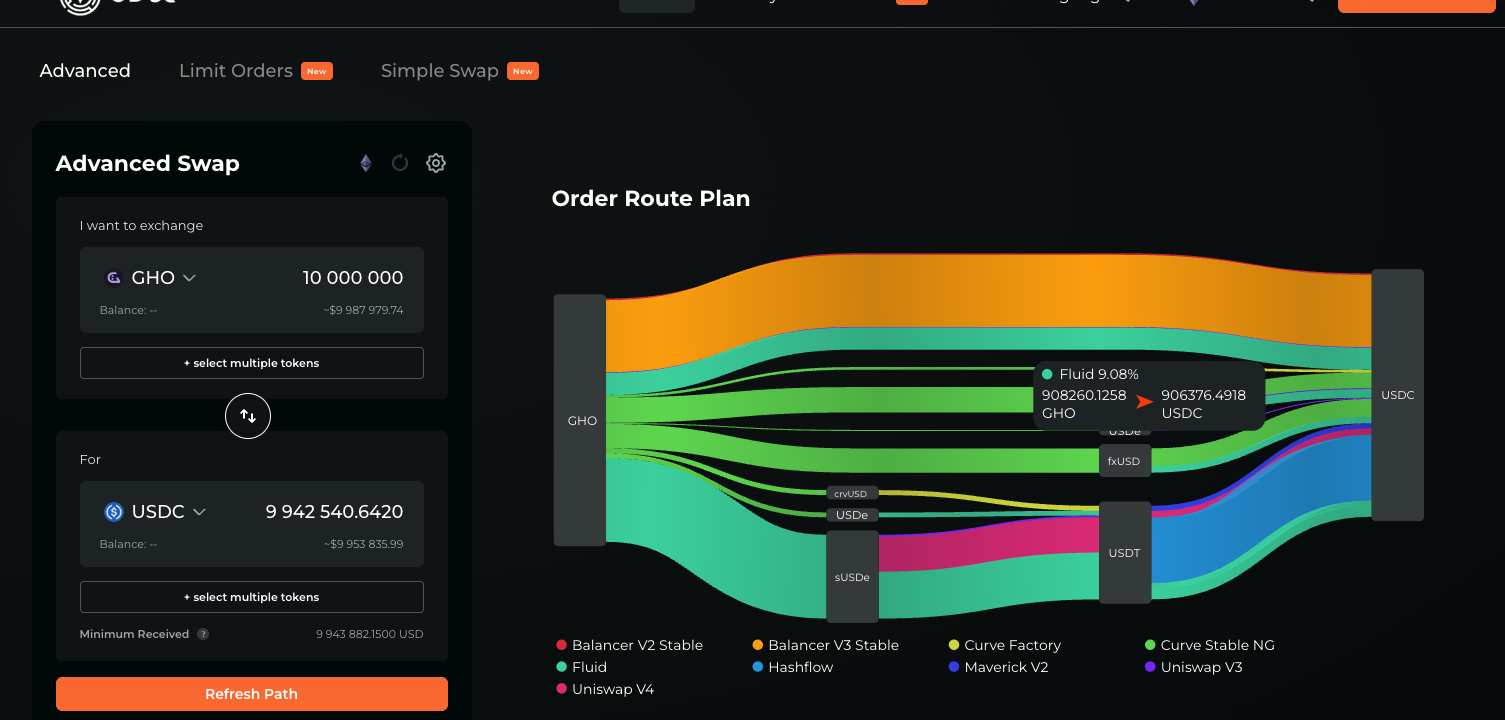

In [52]:
gho_dex_df = all_valid_dex_dfs[
    (all_valid_dex_dfs["base_token_symbol"] == "GHO") |
    (all_valid_dex_dfs["quote_token_symbol"] == "GHO")
].copy()
gho_dex_df.columns

Index(['chainId', 'dexId', 'url', 'pairAddress', 'labels', 'priceNative',
       'priceUsd', 'txns', 'volume', 'priceChange', 'fdv', 'marketCap',
       'pairCreatedAt', 'info', 'datetime_requested', 'datetime_received',
       'base_token_address', 'base_token_name', 'base_token_symbol',
       'quote_token_address', 'quote_token_name', 'quote_token_symbol',
       'liquidity_usd', 'liquidity_base', 'liquidity_quote',
       'base_token_price_usd', 'quote_token_price_usd',
       'base_token_usd_liquidity', 'quote_token_usd_liquidity', 'chain_id',
       'reference_asset', 'tokemak_portion_ownership',
       'scaled_quote_usd_liquidity', 'scaled_base_usd_liquidity'],
      dtype='object')

In [59]:
# displya on the inetesrgtin gho columns
for col in ["scaled_base_usd_liquidity", "scaled_quote_usd_liquidity"]:
    gho_dex_df[col] = gho_dex_df[col].apply(lambda x: f"${x:,.2f}")

gho_dex_df[["base_token_symbol", "quote_token_symbol", "scaled_base_usd_liquidity", "scaled_quote_usd_liquidity", 'tokemak_portion_ownership']].round(2)

,base_token_symbol,quote_token_symbol,scaled_base_usd_liquidity,scaled_quote_usd_liquidity,tokemak_portion_ownership
3,GHO,crvUSD,"$1,594,470.18","$354,290.32",0.19
19,GHO,USDC,$343.00,$116.00,0.00
31,GHO,USR,"$4,918,904.00","$1,428,268.00",0.00
45,GHO,crvUSD,$100.00,$80.00,0.00
52,GHO,fxUSD,"$3,172,834.00","$1,196,941.00",0.00
61,GHO,USDe,"$1,464,014.00","$348,655.00",0.00
71,GHO,USDC,"$789,681.00","$26,919.00",0.00


In [ ]:
# I don't trust the 

In [ ]:
break

In [ ]:
# #https://docs.coingecko.com/reference/pool-address

# #   "data": {
#     "id": "string",
#     "type": "string",
#     "attributes": {
#       "base_token_price_usd": "string",
#       "base_token_price_native_currency": "string",
#       "quote_token_price_usd": "string",
#       "quote_token_price_native_currency": "string",
#       "base_token_price_quote_token": "string",
#       "quote_token_price_base_token": "string",
#       "address": "string",
#       "name": "string",
#       "pool_name": "string",
#       "pool_fee_percentage": "string",
#       "pool_created_at": "string",
#       "fdv_usd": "string",
#       "market_cap_usd": "string",
#     }

In [ ]:
break

In [ ]:
pair_df

In [ ]:
def fetch_large_pairs_df_from_coingecko():
    """
    Fetch pairs for a given token address using DexScreener.
    """
    df = fetch_latest_asset_exposure()
    mainnet_df = df[df["chain_id"] == 1]

    tokens_to_check = set(mainnet_df["token_address"].unique().tolist())
    pair_df, failed = asyncio.run(fetch_many_pairs_from_coingecko(tokens_to_check, ETH_CHAIN))

    large_pairs_df = pair_df[pair_df["liquidity_usd"] > 100_000].copy()
    large_pairs_df = pair_df.copy()

    # tokens = list(
    #     set(
    #         [
    #             *large_pairs_df["base_token_address"].unique().tolist(),
    #             *large_pairs_df["quote_token_address"].unique().tolist(),
    #         ]
    #     )
    # )

    # prices_df = fetch_token_prices_from_coingecko(ETH_CHAIN, tokens)

    # token_address_to_usd_prices = prices_df.set_index("token_address")["usd_price"].to_dict()
    # large_pairs_df["usd_quote_liqudity"] = (
    #     large_pairs_df["quote_token_address"].map(token_address_to_usd_prices) * large_pairs_df["liquidity_quote"]
    # )
    # large_pairs_df["usd_base_liqudity"] = (
    #     large_pairs_df["base_token_address"].map(token_address_to_usd_prices) * large_pairs_df["liquidity_base"]
    # )
    # large_pairs_df["total_liquidity_usd"] = large_pairs_df["usd_quote_liqudity"] + large_pairs_df["usd_base_liqudity"]
    return large_pairs_df, failed


large_pairs_df, failed = fetch_large_pairs_df_from_coingecko()

In [ ]:
# some options
# maybe coingecko is better at finding pairs?

In [ ]:
# correct, but
def build_our_token_to_total_other_token_liquidity(large_pairs_df):

    our_tokens = df["token_address"].tolist()

    our_token_to_total_other_token_liquidity = {}

    token_symol_to_dfs = {}

    for token in our_tokens:
        # also works by token address
        sub_df = large_pairs_df[
            (large_pairs_df["base_token_address"] == token) | (large_pairs_df["quote_token_address"] == token)
        ]
        if sub_df.empty:
            continue

        quote_token_is_target = sub_df[(sub_df["quote_token_address"] == token)]

        quote_liqudity = quote_token_is_target.groupby("base_token_symbol")["usd_base_liqudity"].sum().to_dict()

        base_token_is_target = sub_df[(sub_df["base_token_address"] == token)]
        base_liqudity = base_token_is_target.groupby("quote_token_symbol")["usd_quote_liqudity"].sum().to_dict()

        for k, v in base_liqudity.items():
            if k not in quote_liqudity:
                quote_liqudity[k] = 0
            quote_liqudity[k] += v

        our_token_symbol = (
            quote_token_is_target["quote_token_symbol"].iloc[0]
            if not quote_token_is_target.empty
            else base_token_is_target["base_token_symbol"].iloc[0]
        )

        our_token_to_total_other_token_liquidity[our_token_symbol] = quote_liqudity
        token_symol_to_dfs[our_token_symbol] = sub_df

    return our_token_to_total_other_token_liquidity, token_symol_to_dfs


our_token_to_total_other_token_liquidity, token_symol_to_dfs = build_our_token_to_total_other_token_liquidity(
    large_pairs_df
)  # our_token_to_total_other_token_liquidity

In [ ]:
token_symol_to_dfs["GHO"]

In [ ]:
token_symol_to_dfs["GHO"]
# note this method misses the big pool of
# https://balancer.fi/pools/ethereum/v3/0x85b2b559bc2d21104c4defdd6efca8a20343361d

# I need a way to get this that is not manual

# tokens have aliases

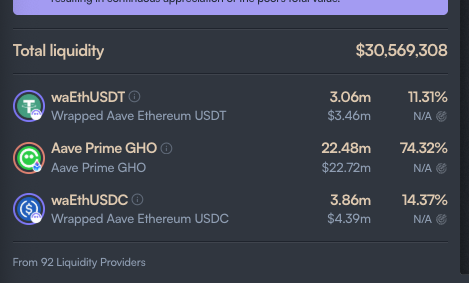

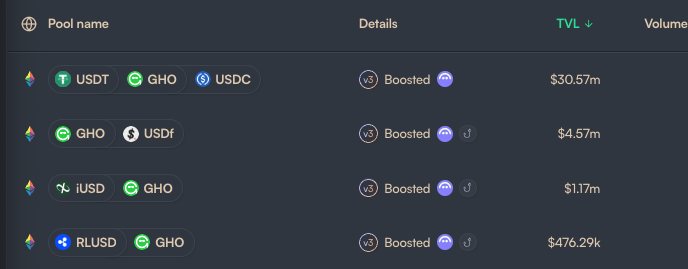

In [ ]:
# dex screener is not showing this as accurate it misses the othe rpools

# maybe aliaises, GHO -> stGHO, aGHO (manually)

In [ ]:
# it misses these pools

# sanity check, this is showing on mainnet that there is only 8.7M total in the other pair, and we currently own, 4.4M GHO,

that seems way too high

check balancer and curve 

In [ ]:
large_pairs_df[large_pairs_df["base_token_symbol"] == "GHO"]["usd_quote_liqudity"].sum().round()

In [ ]:
large_pairs_df["usd_quote_liqudity_thousands"] = large_pairs_df["usd_quote_liqudity"] / 1000
large_pairs_df["usd_base_liqudity_thousands"] = large_pairs_df["usd_base_liqudity"] / 1000

In [ ]:
large_pairs_df[large_pairs_df["base_token_symbol"] == "GHO"]["usd_quote_liqudity_thousands"].sum() * 1000
# this is

In [ ]:
large_pairs_df[large_pairs_df["base_token_symbol"] == "GHO"]

In [ ]:
prices[prices["token_address"] == "0x40D16FC0246aD3160Ccc09B8D0D3A2cD28aE6C2f"]

#

In [ ]:
sub_df.columns

In [ ]:
rows = [
    {"from_token": outer_k, "to_token": inner_k, "pair_liqudity": v}
    for outer_k, inner_dict in our_token_to_total_other_token_liquidity.items()
    for inner_k, v in inner_dict.items()
]

exit_liqudity_df = pd.DataFrame(rows)
exit_liqudity_df = exit_liqudity_df.groupby("from_token")["pair_liqudity"].sum().round().sort_values(ascending=False)
exit_liqudity_df

In [ ]:
our_exposure = df.groupby("token_symbol")["quantity"].sum()


our_exposure_with_liquidity = exit_liqudity_df.to_frame().join(our_exposure, how="left")
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_white"

fig = px.bar(
    our_exposure_with_liquidity,
    x=our_exposure_with_liquidity.index,
    y=["pair_liqudity", "quantity"],
    title="Exit Liquidity vs Our Exposure",
)

fig.update_layout(barmode="group")  # Ensures bars are side-by-side
fig.show()

NameError: name 'df' is not defined

imo we are find to ignore the uniswap v4 pools, mostly for ETH and BTC and USDC and USDT already very very liqudity pools

https://app.uniswap.org/explore/pools/ethereum

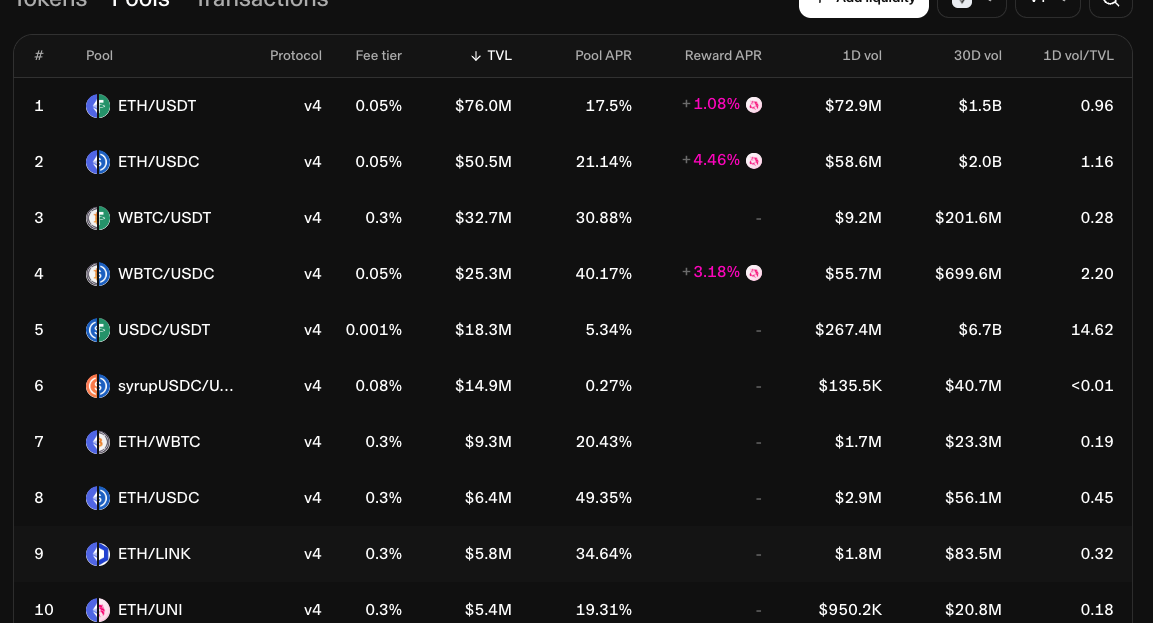